# Decision Tree Classification - Heart Data

In this tutorial, we will use the [Heart Disease dataset from UC Irvine](https://archive.ics.uci.edu/dataset/45/heart+disease). It contains  4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach.

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

Below is the list of variables:

| Variable Name | Role | Type | Demographic | Description | Units | Missing Values |
| - | - | - | - | - | - | - |
| age | Feature | Integer | Age |  | years | no |
| sex | Feature | Categorical | Sex |  |  | no |
| cp | Feature | Categorical |  |  |  | no |
| trestbps | Feature | Integer |  | resting blood pressure (on admission to the hospital) | mm Hg | no |
| chol | Feature | Integer |  | serum cholestoral | mg/dl | no |
| fbs | Feature | Categorical |  | fasting blood sugar > 120 mg/dl |  | no |
| restecg | Feature | Categorical |  |  |  | no |
| thalach | Feature | Integer |  | maximum heart rate achieved |  | no |
| exang | Feature | Categorical |  | exercise induced angina |  | no |
| oldpeak | Feature | Integer |  | ST depression induced by exercise relative to rest |  | no |
| slope | Feature | Categorical |  |  |  | no |
| ca | Feature | Integer |  | number of major vessels (0-3) colored by flourosopy |  | yes |
| thal | Feature | Categorical |  |  |  | yes |
| num | Target | Integer |  | diagnosis of heart disease |  | no |      


In [1]:
# Fetching the dataset

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

Let's look at the shape of our data

In [2]:
print(X.shape)
print(y.shape)

(303, 13)
(303, 1)


It seems that we have indeed 303 entries with 13 feature and 1 diagnosis.

Let's look at some of the metadata regarding this dataset. What do you learn ?

In [3]:
# metadata 
import json
print(json.dumps(heart_disease.metadata, indent=2))

{
  "uci_id": 45,
  "name": "Heart Disease",
  "repository_url": "https://archive.ics.uci.edu/dataset/45/heart+disease",
  "data_url": "https://archive.ics.uci.edu/static/public/45/data.csv",
  "abstract": "4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach",
  "area": "Health and Medicine",
  "tasks": [
    "Classification"
  ],
  "characteristics": [
    "Multivariate"
  ],
  "num_instances": 303,
  "num_features": 13,
  "feature_types": [
    "Categorical",
    "Integer",
    "Real"
  ],
  "demographics": [
    "Age",
    "Sex"
  ],
  "target_col": [
    "num"
  ],
  "index_col": null,
  "has_missing_values": "yes",
  "missing_values_symbol": "NaN",
  "year_of_dataset_creation": 1989,
  "last_updated": "Fri Nov 03 2023",
  "dataset_doi": "10.24432/C52P4X",
  "creators": [
    "Andras Janosi",
    "William Steinbrunn",
    "Matthias Pfisterer",
    "Robert Detrano"
  ],
  "intro_paper": {
    "title": "International application of a new probability algorithm for the 

In [4]:
print(heart_disease.metadata["additional_info"]["summary"])

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
   
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database.  All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs" 


Let's have a look at the variables...

In [5]:
# variable information 
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

It's always good to try an print the data to see what we are dealing with.

Let's fist check what kind of data we're dealing with.

In [6]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


The data is already conveniently stored in a [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), which is very good because we can use it directly. Check out the pandas website should you need to learn how to put the data in a DataFrame.

We can now plot the features.

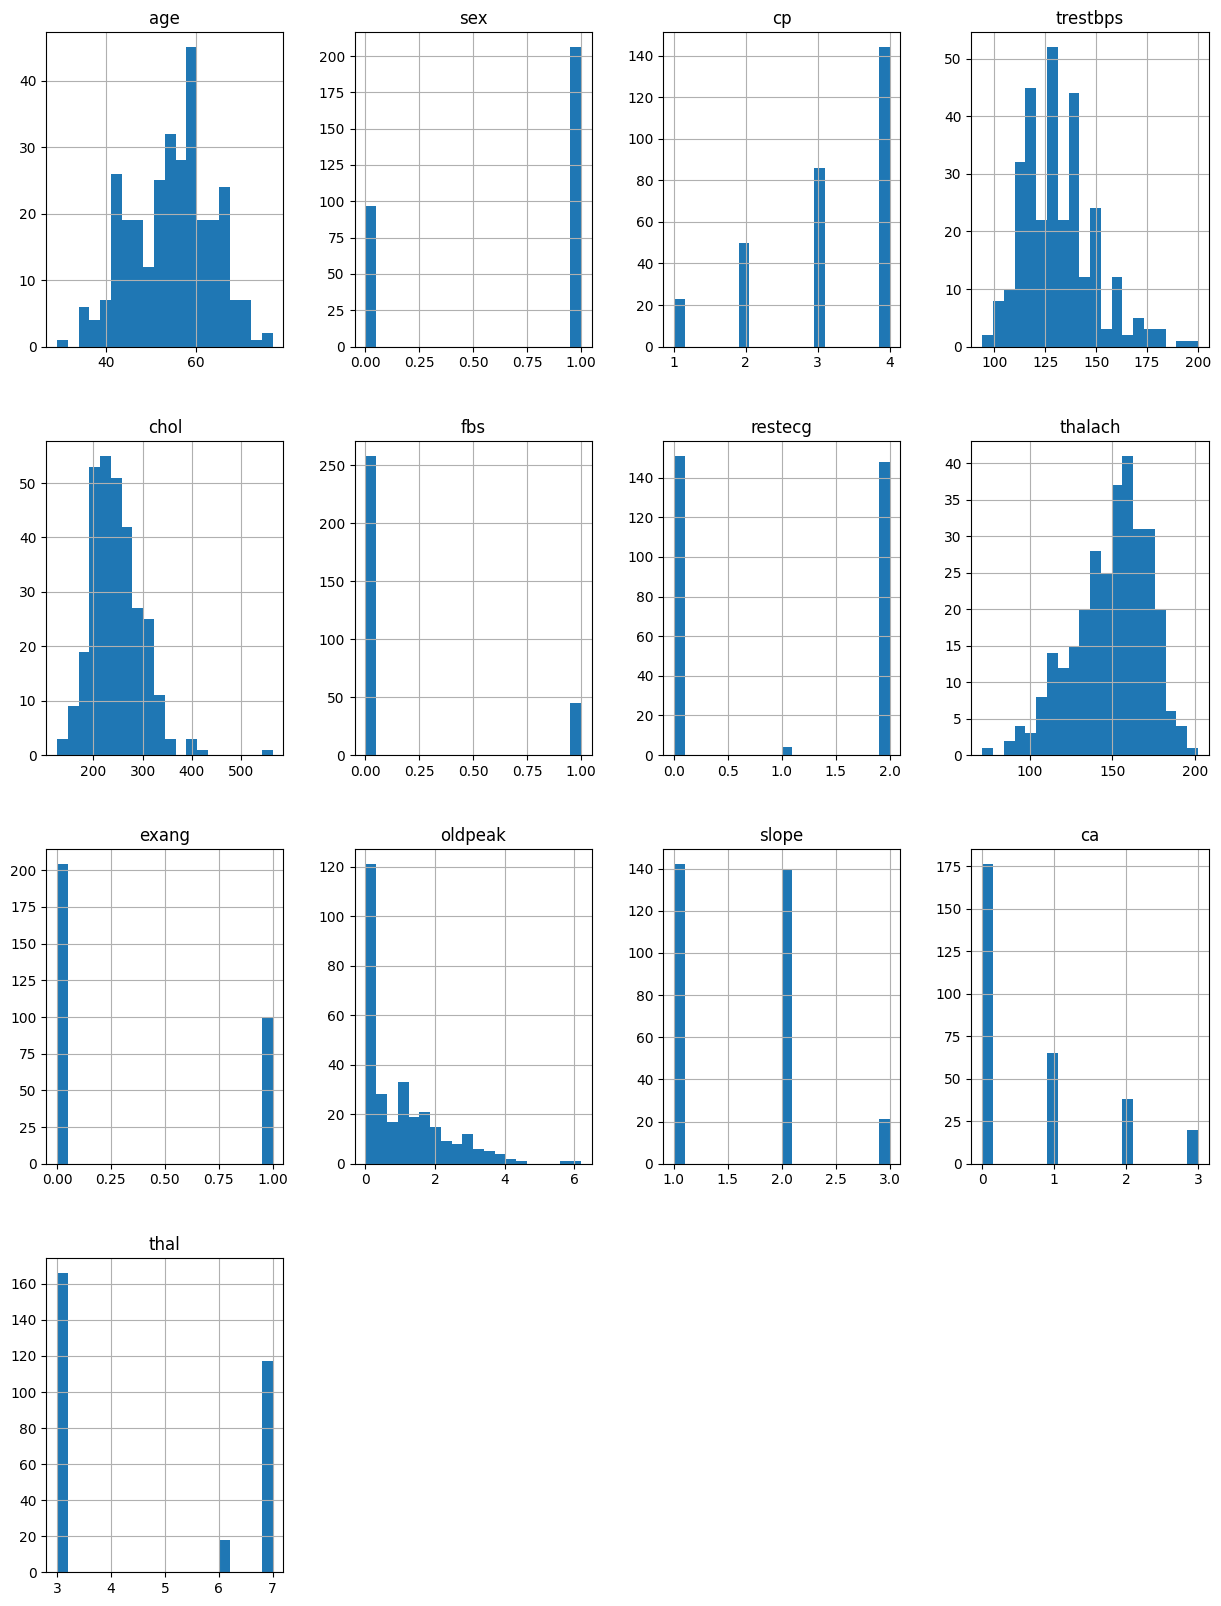

In [7]:
hists = X.hist(bins=20, figsize=(15,20))

And the correlation matrix.

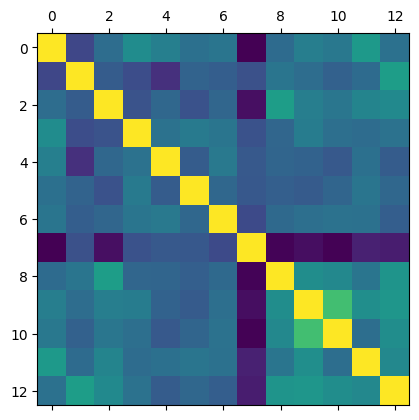

In [8]:
import matplotlib.pyplot as plt
plt.matshow(X.corr())
plt.show()

We are now ready to try a classifier. Normally we'd run the following code, but it throws an error. Let's investigate.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

# This code will throw a "ValueError: Input X contains NaN."
# defining our model
model = RandomForestClassifier(n_estimators=1000)

# fitting our model
model.fit(Xtrain, ytrain)
# checking the model's prediction
ypred = model.predict(Xtest)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

We see that he algorithm cannot run (and we are advised to try another) because there are NaN values in our dataset.

We can confirm this by querying the DataFrame and and asking if there are any values which are NaN. (The answer is True.)

In [10]:
X.isnull().values.any()

True

Let's now check which rows have a NaN value...

In [11]:
X.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302     True
Length: 303, dtype: bool

Now only plotting those which have a NaN value.

In [12]:
X[X.isna().any(axis=1)]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
87    53    0   3       128   216    0        2      115      0      0.0   
166   52    1   3       138   223    0        0      169      0      0.0   
192   43    1   4       132   247    1        2      143      1      0.1   
266   52    1   4       128   204    1        0      156      1      1.0   
287   58    1   2       125   220    0        0      144      0      0.4   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
87       1  0.0   NaN  
166      1  NaN   3.0  
192      2  NaN   7.0  
266      2  0.0   NaN  
287      2  NaN   7.0  
302      1  NaN   3.0

We see that these are present in the `ca` and `thal` columns (and we were warned about it above, as it was mentioned that this column at missing values). 

The treatment of missing values is important. We usually have 3 options:
1. Discard the missing values before training.
2. Rely on the machine learning algorithm to deal with missing values during the model training.
3. Impute missing values before training. The simplest approach is to impute the missing values by the mean or median of the non-missing values for the given feature.

Most of the time, imputing missing values is necessary. But here because of the low amount of missing data (6/303) we will simply discard it. But it's interesting to try and impute the values yourself. Try it!

In [13]:
import pandas as pd
X_omit = X[~X.isna().any(axis=1)]
y_omit = y.loc[~X.isna().any(axis=1).to_numpy()]

In [14]:
print(X_omit.shape)
print(y_omit.shape)

(297, 13)
(297, 1)


Let's try our algorithm again.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(X_omit, y_omit.values.ravel(), random_state=0)

# defining our model
model = RandomForestClassifier(n_estimators=1000)
# fitting our model
model.fit(Xtrain, ytrain)
# checking the model's prediction
ypred = model.predict(Xtest)

Let's see how the `train_test_split` split our data:

In [16]:
print(Xtrain.shape, Xtest.shape)

(222, 13) (75, 13)


We see that we have 222 events in our training sample and 75 events in our test sample.

Check the arguments of `train_test_split` to adjust the size of the samples, and re-run the algorithm.

In [17]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest, zero_division=0))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80        56
           1       0.07      0.17      0.10         6
           2       0.12      0.14      0.13         7
           3       0.12      0.17      0.14         6
           4       0.00      0.00      0.00         0

    accuracy                           0.55        75
   macro avg       0.26      0.23      0.23        75
weighted avg       0.75      0.55      0.63        75



Note that above we had to use the `zero_division=0` because some categories are not filled, causing issues when computing the f1-score. When more data is available, this will usually go away.

We can now look at the performance of our algorithm with the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

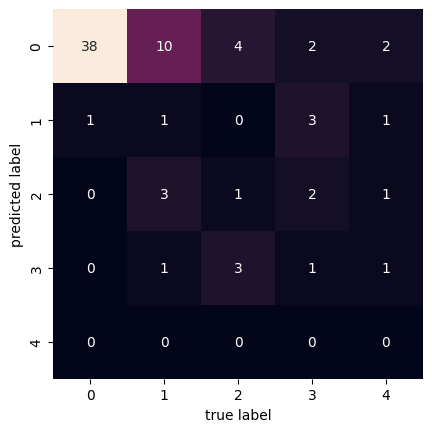

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Our algorithm performs quite well. Though there nare some predictions that are not good. Can you do better ?

Also, do you understand which wrong predictions are bad (because an illness would go undetected) or not a problem ?